In [26]:
#1
import pandas as pd
from scipy.io.arff import loadarff

# Read data from the file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


Most Discriminative Feature:
degree_spondylolisthesis
with F-Score:
119.12288060759764

Least Discriminative Feature:
pelvic_radius
16.86693475538006


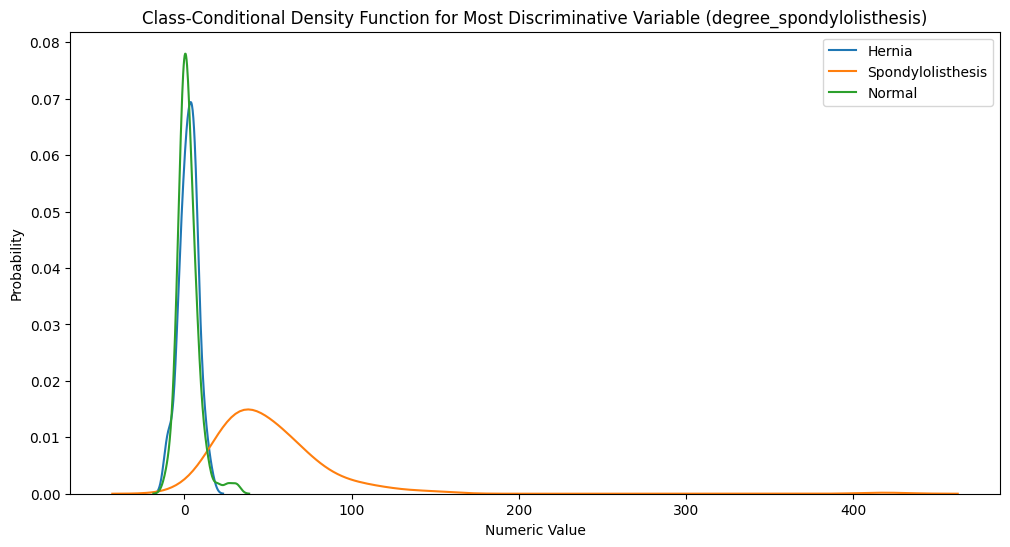

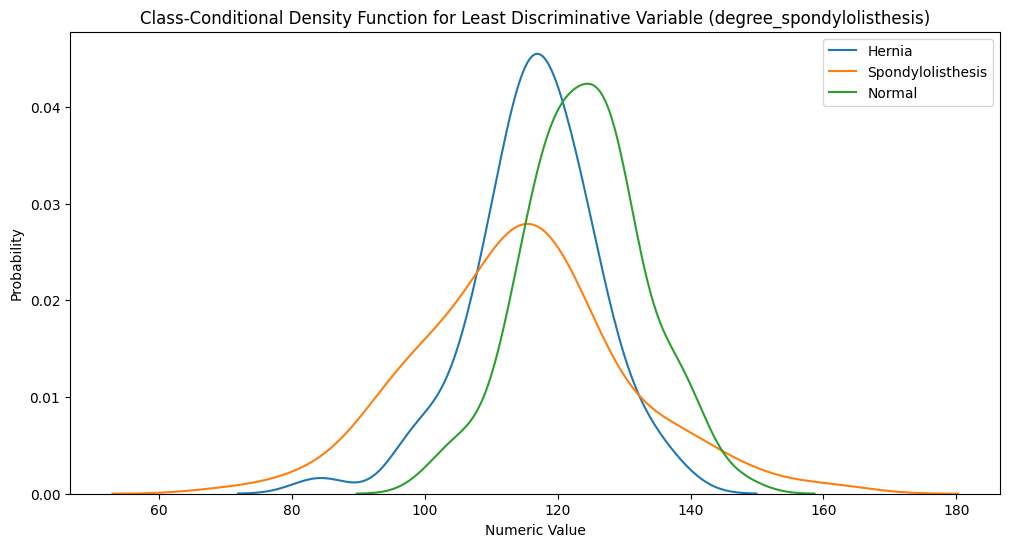

In [27]:
#1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

# Separate features from the outcome (class)
X = df.drop('class', axis=1)
y = df['class']

fimportance = f_classif(X, y)
results_df = pd.DataFrame({'Feature': X.columns, 'F-Score': fimportance[0]})

most_discriminative = results_df.sort_values(by='F-Score',ascending=False)

print("Most Discriminative Feature:")
print(most_discriminative['Feature'].iloc[0])
print("with F-Score:")
print(most_discriminative['F-Score'].iloc[0])

print("\nLeast Discriminative Feature:")
print(most_discriminative['Feature'].iloc[5])
print(most_discriminative['F-Score'].iloc[5])

# Plot for the most discriminative feature
plt.figure(figsize=(12, 6))
most_discriminative_feature = most_discriminative['Feature'].iloc[0]
for c in df['class'].unique():
    c_data = df[df['class'] == c]
    sns.kdeplot(data=c_data, x=most_discriminative_feature, label=c)

plt.xlabel('Numeric Value')
plt.ylabel('Probability')
plt.title(f'Class-Conditional Density Function for Most Discriminative Variable ({most_discriminative_feature})')
plt.legend()

# Create a new figure for the least discriminative feature
plt.figure(figsize=(12, 6))
least_discriminative_feature = most_discriminative['Feature'].iloc[5]
for c in df['class'].unique():
    c_data = df[df['class'] == c]
    sns.kdeplot(data=c_data, x=least_discriminative_feature, label=c)

plt.xlabel('Numeric Value')
plt.ylabel('Probability')
plt.title(f'Class-Conditional Density Function for Least Discriminative Variable ({most_discriminative_feature})')
plt.legend()
plt.show()


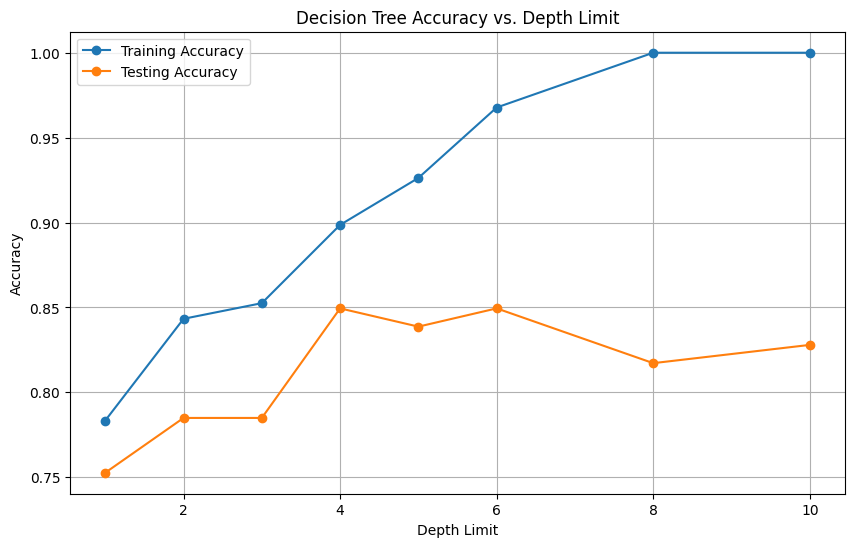

In [28]:
#2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics, tree
from sklearn.metrics import accuracy_score

depth_limits = [1,2,3,4,5,6,8,10]

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

for limit in depth_limits:
    X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, stratify = y, random_state=0)
    predictor = tree.DecisionTreeClassifier(max_depth = limit)
    predictor.fit(X_train, y_train)
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, predictor.predict(X_train))
    train_accuracies.append(train_accuracy)
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, predictor.predict(X_test))
    test_accuracies.append(test_accuracy)

# Plot the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(depth_limits, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_limits, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Decision Tree Accuracy vs. Depth Limit')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#3

Com base no gráfico apresentado concluímos que a profundidade que melhor se adequa ao conjunto é 4, por ser o valor em que a accuracy de treino e de teste se encontram simultaneamente mais elevadas.
Observamos que a accuracy do conjunto de teste começa a baixar a partir do limite de profundidade de 4 pois, o excesso de profundidade faz com que os dados se ajustem demasiado ao conjunto de treino  não conseguindo rotular com sucesso objetos ainda não observados, ou seja, estamos perante overfitting.


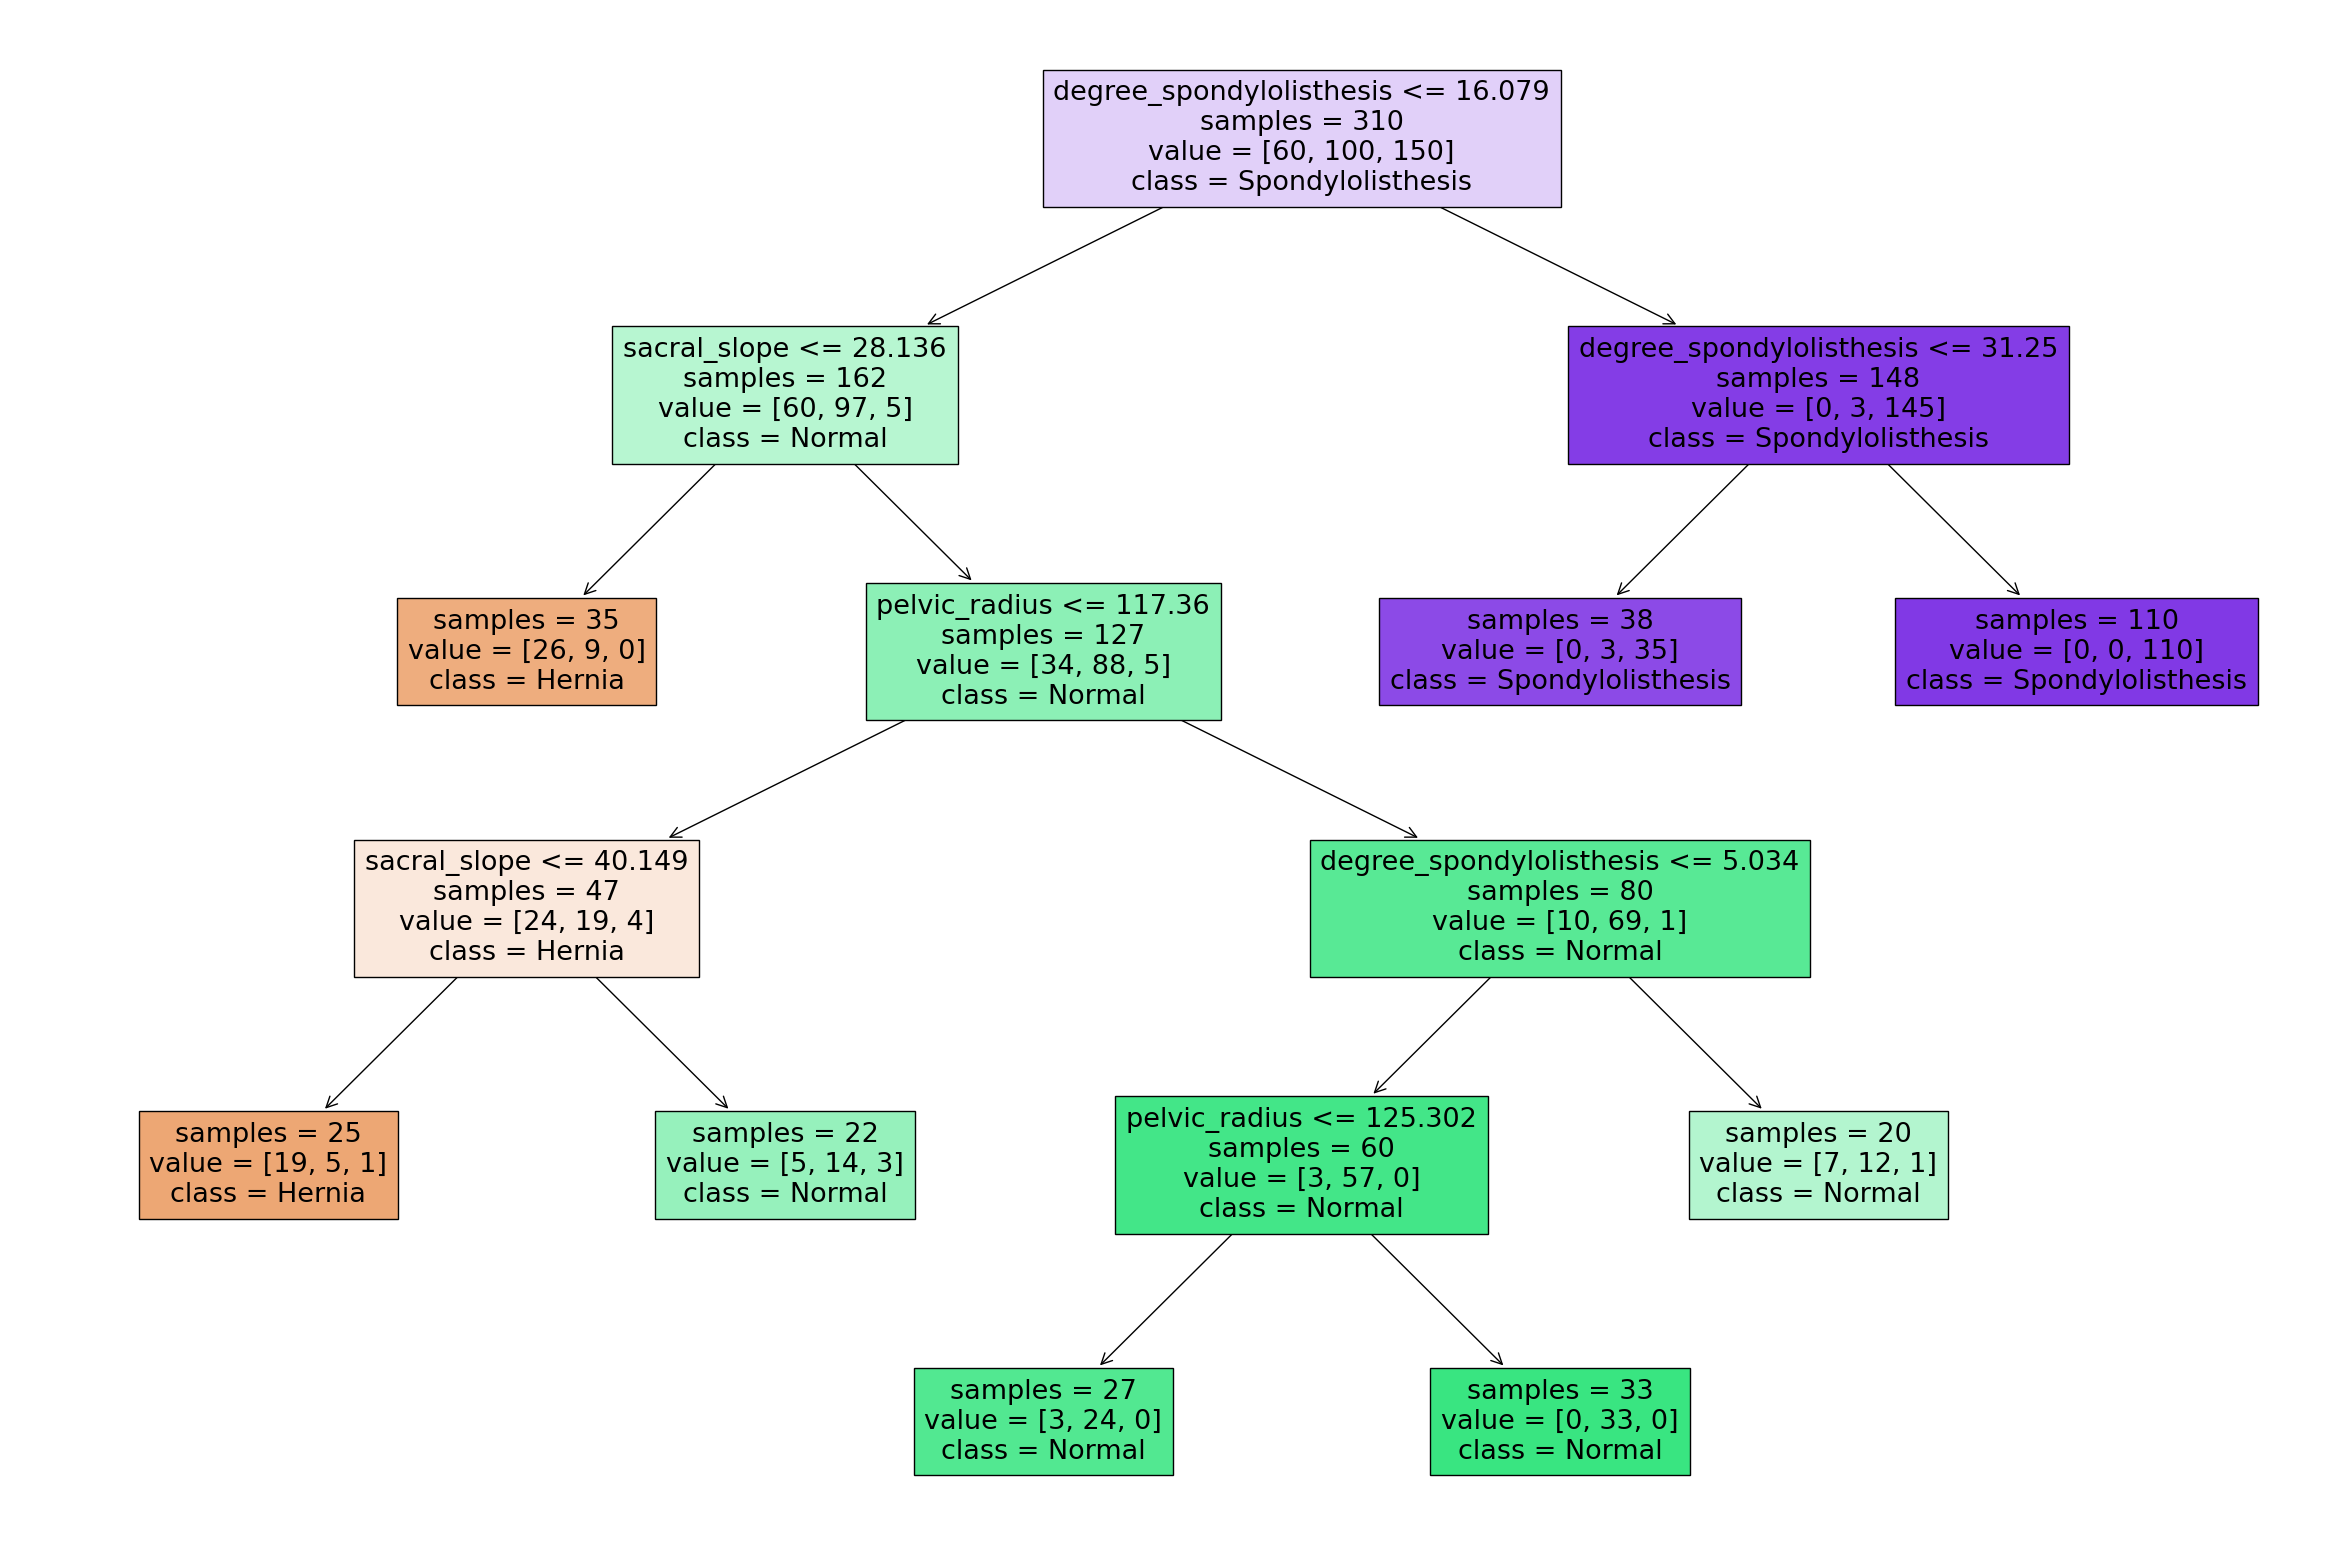

In [29]:
#4a)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from scipy.io import arff
import pandas as pd

data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
in_vars = df.drop(columns=['class'])
out_vars = df['class']

predictor = tree.DecisionTreeClassifier(min_samples_leaf=20)
predictor.fit(in_vars, out_vars)

fig = plt.subplots(figsize=(30, 20))

tree.plot_tree(predictor, feature_names=in_vars.columns.tolist(), class_names=np.unique(out_vars).tolist(), filled=True, impurity=False)
plt.show()

4.b)

Para alguém ter uma hernia, precisa de ter um degree_spondylolisthesis <= 16.079 e sacral slope <= 28.136. Caso tenha pelvic_radius <= 117.36, terá de ter sacral slope <= 40.149 e assim 25 pessoas da nossa amostra têm uma hernia. Caso contrário, temos 35 pessoas da nossa amostra que têm uma hernia.